In [66]:
#%pylab inline
from mpl_toolkits.mplot3d import Axes3D
from pythreejs import *
from soda import *
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go

import plotly 
plotly.tools.set_credentials_file(username='jngc', api_key='CT53kjomy6ra9AqMdpmo')

In [2]:
font = {'size':18, 'family':'serif'}
plt.matplotlib.rc('font', **font)

# To-do:

1. Check Sag orbit.
2. Make plots of R_NGC2419_gal vs time, Sag_Rgal vs time and find when in time the orbits coincide.
3. Implement Vera-Ciro 13 potential.
4. Use Massari ICs.
5. Compare with galpy.
6. Check the uncertainty of the model on the orbit and compare it with the uncertainty of the measurements.



In [3]:
#def galactocentric_theta_phi():
    
def orbit_plots(t, xyz):
    
    """
    Orbit projection plots
    """
    
    x = xyz[:,0]
    y = xyz[:,1]
    z = xyz[:,2]
    
    figure = figsize(24, 16)
    subplot(2, 3, 1)
    plot(x, y,  c='k', lw=1.5)
    xlabel('$x [Kpc]$', fontsize=25)
    ylabel('$y [Kpc]$', fontsize=25)
    
    subplot(2, 3, 2)
    plot(x, z,  c='k', lw=1.5)
    xlabel('$x [Kpc]$', fontsize=25)
    ylabel('$z [Kpc]$', fontsize=25)
 
    subplot(2, 3, 3)
    plot(y, z,  c='k', lw=1.5)
    xlabel('$y [Kpc]$', fontsize=25)
    ylabel('$z [Kpc]$', fontsize=25)
    
    subplot(2, 3, 4)
    plot(t, (x**2.0+y**2.0+z**2.0)**0.5, c='k', lw=1.5)
    xlabel('$\mathrm{Time [Gyrs]}$', fontsize=25)
    ylabel('$\mathrm{R_{gal}[Kpc]}$', fontsize=25)
    
    

In [4]:
def aitoff_projection(x, y, z):
    """
    aitoff projection
    """
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = arccos(z/r)
    phi = arctan2(y,x)
    
    subplot(111, projection='aitoff')
    plot(theta, phi,lw=1.5, c='k')
    plt.grid(True)
    

In [8]:
 def extract(dct, namespace=None):
    # function that extracts variables from kwargs
    # from:
    # http://stackoverflow.com/questions/4357851/creating-or-assigning-variables-from-a-dictionary-in-python

    if not namespace: namespace = globals()
    namespace.update(dct)


In [9]:
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)



In [16]:
def traces(xyz, **kwargs):
    extract(kwargs)

    NGC2419 = go.Scatter3d(
        x=xyz[:,0], y=xyz[:,1], z=xyz[:,2],
        marker=dict(
            size=0.5,
            color='',
            colorscale='Viridis',
        ),
        line=dict(
            color='k',
            colorscale='Viridis',
            width=2
        )
    )

    NGC2419_t0 = go.Scatter3d(
        x=xyz[0,0], y=xyz[0,1], z=xyz[0,2],
        marker=dict(
            size=5,
            color='r',
        )
    )
    
    if ('xyz22' in kwargs) & ('xyz33' not in kwargs):
        sgr = go.Scatter3d(
            x=xyz22[:,0], y=xyz22[:,1], z=xyz22[:,2],
            marker=dict(
                size=0.5,
                color='',
                colorscale='Viridis',
            ),
            line=dict(
                color='purple',
                colorscale='Viridis',
                width=2
            )
        )

        sgr_t0 = go.Scatter3d(
            x=xyz22[0,0], y=xyz22[0,1], z=xyz22[0,2],
            marker=dict(
                size=5,
                color='k',
            )
        )
        
        return [NGC2419, NGC2419_t0, sgr, sgr_t0]
    
    if ('xyz33' in kwargs) & ('xyz22' in kwargs):
        print('here')
        sgr = go.Scatter3d(
            x=xyz22[:,0], y=xyz22[:,1], z=xyz22[:,2],
            marker=dict(
                size=0.5,
                color='',
                colorscale='Viridis',
            ),
            line=dict(
                color='purple',
                colorscale='Viridis',
                width=2
            )
        )

        sgr_t0 = go.Scatter3d(
            x=xyz22[0,0], y=xyz22[0,1], z=xyz22[0,2],
            marker=dict(
                size=5,
                color='k',
            )
        )
        
        print('here')
        LMC = go.Scatter3d(
            x=xyz33[:,0], y=xyz33[:,1], z=xyz33[:,2],
            marker=dict(
                size=0.5,
                color='',
                colorscale='Viridis',
            ),
            line=dict(
                color='green',
                colorscale='Viridis',
                width=2
            )
        )

        LMC_t0 = go.Scatter3d(
            x=xyz33[0,0], y=xyz33[0,1], z=xyz33[0,2],
            marker=dict(
                size=5,
                color='blue',
            )
        )
        
        return [NGC2419, NGC2419_t0, sgr, sgr_t0, LMC, LMC_t0]
    
    
    else: 
        return [NGC2419, NGC2419_t0]

def plot_3d_orbit(xyz, filename, **kwargs):
    extract(kwargs)

    data = traces(xyz)
    if 'xyz2' in kwargs:
        #xyz22=xyz2
        data = traces(xyz, xyz22=xyz2)
        
    if ('xyz2' in kwargs) & ('xyz3' in kwargs):
        #xyz22=xyz2
        data = traces(xyz, xyz22=xyz2, xyz33=xyz3)

    steps = []
    for i in range(len(data)):
        step = dict(
            method = 'restyle',
            args = ['visible', [False] * len(data)],
        )
        step['args'][1][i] = True # Toggle i'th trace to "visible"
        steps.append(step)

    sliders = [dict(
        active = 10,
        currentvalue = {"prefix": "Frequency: "},
        pad = {"t": 50},
        steps = steps
    )]


    layout = dict(
        #sliders=sliders,
        width=800,
        height=700,
        autosize=False,
        title='orbits',
        scene=dict(
            xaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=False,
                backgroundcolor='rgb(230, 230,230)'
            ),
            yaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=False,
                backgroundcolor='rgb(230, 230,230)'
            ),
            zaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=False,
                backgroundcolor='rgb(230, 230,230)'
            ),
            camera=dict(
                up=dict(
                    x=0,
                    y=0,
                    z=1
                ),
                eye=dict(
                    x=-1.7428,
                    y=1.0707,
                    z=0.7100,
                )
            ),
            aspectratio = dict( x=1, y=1, z=0.7 ),
            aspectmode = 'manual'
        ),
    )


    fig = dict(data=data, layout=layout)

    py.iplot(fig, filename=filename, height=700, validate=False)

# Orbits around a spherical MW

In [5]:
time = 4

# GC 6D coordinates
pos_sat = [-87.43, -0.51, 37.31]
vel_sat = [16.55, 48.46, -31.33]

pos_NGC2419 = [-87.43, -0.51, 37.31]
vel_NGC2419 = [16.55, 48.46, -31.33]

host_model = ['NFW', 1.2E12, 261, 9.86]
disk_params = [6.5E10, 3.0, 0.5]
bulge_params = [1E10, 0.7]


In [52]:
# Integrating in MW only potential
%time t, posNGC_sphMW, velNGC_sph_MW = leapfrog.integrate_mw(time, pos_NGC2419, vel_NGC2419, host_model,\
                                                             disk_params, bulge_params, direction=1, dt=0.001)

CPU times: user 22.4 s, sys: 0 ns, total: 22.4 s
Wall time: 22.4 s


In [53]:
def normed_velocity(vel):
    vel_array = np.array([vel[0], vel[1], vel[2]])
    vel_array_normed = vel_array/norm(vel_array)
    return vel_array_normed

In [54]:
#vel_NGC_ar = np.array([vel_NGC2419[0], vel_NGC2419[1], vel_NGC2419[2]])
#vel_NGC_ar_normed = vel_NGC_ar/norm(vel_NGC_ar)*50
vel_NGC_ar_normed = normed_velocity(vel_NGC2419)*50

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/lib/python3/dist-packages/matplotlib/bezier.py:294: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future

/usr/lib/python3/dist-packages/matplotlib/bezier.py:295: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



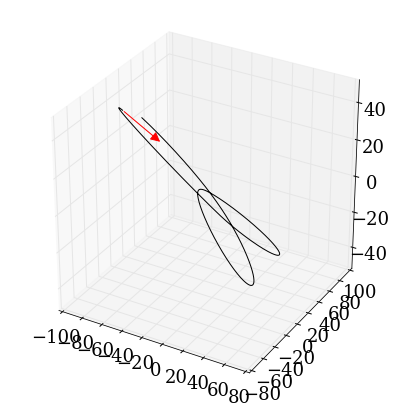

In [12]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(posNGC_sphMW[:,0], posNGC_sphMW[:,1], posNGC_sphMW[:,2], c='k')
a =Arrow3D([pos_NGC2419[0],pos_NGC2419[0]+vel_NGC_ar_normed[0]],[pos_NGC2419[1], pos_NGC2419[1]+vel_NGC_ar_normed[1]]
          ,[pos_NGC2419[2], pos_NGC2419[2]+vel_NGC_ar_normed[2]], mutation_scale=20, lw=1, arrowstyle="-|>", color="r")

ax.add_artist(a)


In [17]:
plot_3d_orbit(posNGC_sphMW, 'NGC_spherical_MW')

# Orbits with Sag

In [55]:
def galactocentic(xyzMW, xyzSat):
    """
    Transforming to galactocentric coordinates
    """
    xyz_sat_gal = np.array([xyzSat[:,0]-xyzMW[:,0], xyzSat[:,1]-xyzMW[:,1],
                            xyzSat[:,2]-xyzMW[:,2]]).T
    return xyz_sat_gal

In [20]:
satellite_model = ['hernquist', 1E10, 9.8]
satellite_model_sgr2 = ['NFW', 1E10, 44, 8]

sgr_pos = [16.1, 2.35, -6.12]
sgr_vel = [242.5, 5.6, 228.1]

pos_host = [0,0,0]
vel_host = [0,0,0]

pos_NGC2419 = [-87.43, -0.51, 37.31]
vel_NGC2419 = [16.55, 48.46, -31.33]

host_model = ['NFW', 1.2E12, 261, 9.86]
disk_params = [6.5E10, 3.0, 0.5]
bulge_params = [1E10, 0.7]

In [68]:
t1, posSag1, velSag1, posMWs1, velMWs1 = leapfrog.integrate_sat(8, pos_host, vel_host,
                                                               host_model, disk_params,
                                                               bulge_params,
                                                               dt=0.001, alpha=[0, 0.23],
                                                               pos_sat=sgr_pos,
                                                               vel_sat=sgr_vel,
                                                               satellite_model=satellite_model)

Host:  0.0 0.0 0.0
Satellite 1 : 16.1 2.35 -6.12
done t=1


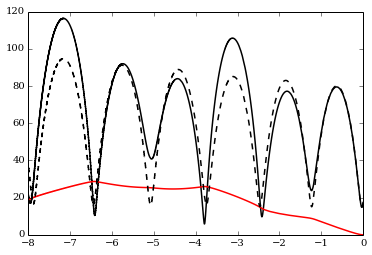

In [74]:
posSag_G1 = galactocentic(posMWs1, posSag1)
r_sag_G1 = (posSag_G1[:,0]**2.0 + posSag_G1[:,1]**2.0 + posSag_G1[:,2]**2.0)**0.5
plot(t1, r_sag_G1, lw=1.5, c='k')
plot(t1, (posMWs1[:,0]**2 + posMWs1[:,1]**2 + posMWs1[:,2]**2)**0.5, lw=1.5, c='r')
plot(t1, (posSag1[:,0]**2 + posSag1[:,1]**2 + posSag1[:,2]**2)**0.5, lw=1.5, c='k', ls='--')

In [61]:
t, posSag, velSag, posMWs, velMWs, posNGCs, velNGCs = leapfrog.integrate_sat(4, pos_host, vel_host,
                                                                             host_model, disk_params,
                                                                             bulge_params,
                                                                             pos_p=pos_NGC2419, 
                                                                             vel_p=vel_NGC2419,
                                                                             dt=0.001, alpha=[0, 0.23],
                                                                             pos_sat=sgr_pos,
                                                                             vel_sat=sgr_vel,
                                                                             satellite_model=satellite_model)

Host:  0.0 0.0 0.0
Satellite 1 : 16.1 2.35 -6.12
done t=1


In [62]:
posSag_G = galactocentic(posMWs, posSag)
posNGC_G = galactocentic(posMWs, posNGCs)

In [57]:
plot_3d_orbit(posNGC_G, 'NGC_sphericalMW+sagHenrquist', xyz2=posSag_G)

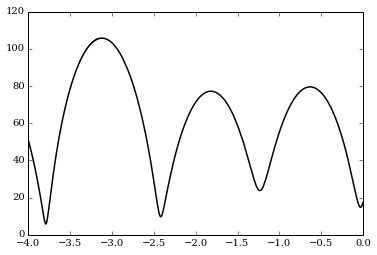

In [63]:
r_sag_G = (posSag_G[:,0]**2.0 + posSag_G[:,1]**2.0 + posSag_G[:,2]**2.0)**0.5
plot(t, r_sag_G, lw=1.5, c='k')

# Orbits with Sag and the LMC

In [12]:
#satellite_model = ['hernquist', 1E9, 5]
satellite_model = ['hernquist', 1E10, 9.8]
LMC_mod = ['hernquist', 3E5, 3]



sgr_pos = [16.1, 2.35, -6.12]
sgr_vel = [242.5, 5.6, 228.1]

pos_host = [0,0,0]
vel_host = [0,0,0]

pos_NGC2419 = [-87.43, -0.51, 37.31]
vel_NGC2419 = [16.55, 48.46, -31.33]

host_model = ['NFW', 1.2E12, 261, 9.86]
disk_params = [6.5E10, 3.0, 0.5]
bulge_params = [1E10, 0.7]

In [13]:
t, posLMC, velLMC, posMWsLMC, velMWsLMC, posNGCsLMC, velNGCsLMC, posSagLMC, velSagLMC = leapfrog.integrate_sat(2, pos_host, vel_host,
                                                                                             host_model, disk_params,
                                                                                             bulge_params,
                                                                                             pos_sat=[-1, -41, -28],
                                                                                             vel_sat=[-57,-226,221],
                                                                                             satellite_model=LMC_mod,                                                    
                                                                                             pos_p=pos_NGC2419, 
                                                                                             vel_p=vel_NGC2419,
                                                                                             dt=0.001, alpha=[0, 0.1],
                                                                                             pos_sat2=sgr_pos,
                                                                                             vel_sat2=sgr_vel,
                                                                                             satellite_model2=satellite_model)

Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
Satellite 2:  16.1 2.35 -6.12
done t=1


In [14]:
posSag_G = galactocentic(posMWsLMC, posSagLMC)
posNGC_G = galactocentic(posMWsLMC, posNGCsLMC)
posLMC_G = galactocentic(posMWsLMC, posLMC)

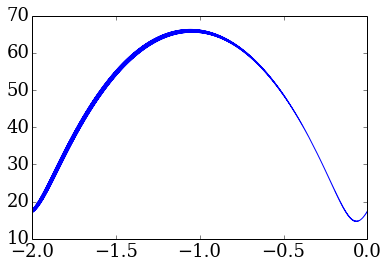

In [10]:
plot(t, (posSag_G[:,0]**2.0 + posSag_G[:,1]**2.0 + posSag_G[:,2]**2.0)**0.5)


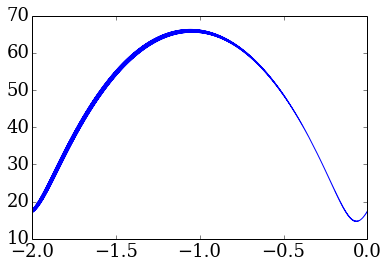

In [14]:
plot(t, (posSag_G[:,0]**2.0 + posSag_G[:,1]**2.0 + posSag_G[:,2]**2.0)**0.5)


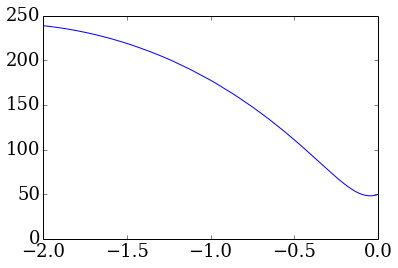

In [13]:
plot(t, (posLMC_G[:,0]**2.0 + posLMC_G[:,1]**2.0 + posLMC_G[:,2]**2.0)**0.5)

In [16]:
plot_3d_orbit(posNGC_G, 'NGC_sphericalMW+sagHenrquist+LMC', xyz2=posSag_G, xyz3=posLMC_G)

NameError: name 'xyz2' is not defined

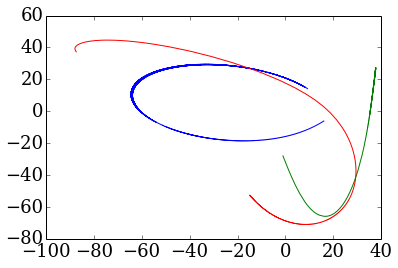

In [17]:
plot(posSag_G[:,0], posSag_G[:,2])
plot(posLMC_G[:,0], posLMC_G[:,2])
plot(posNGC_G[:,0], posNGC_G[:,2])

In [24]:
t, pos_sag, vel_sag, posMWs, velMWs, posNGCs, velNGCs = leapfrog.integrate_sat(2, pos_host, vel_host, host_model,
                                                                               disk_params, bulge_params, lmc_model='LMC1',
                                                                               satellite_model2=satellite_model,
                                                                               pos_sat=sgr_pos, vel_sat=sgr_vel,
                                                                               pos_p=pos_NGC2419, vel_p=vel_NGC2419,
                                                                               dt=0.001, alpha=[0, 0.23])

using the  LMC1
-87.43 -0.51 37.31 16.9258863316 49.5606315185 -32.0415721311
16.1


In [21]:
vel_sag_normed = normed_velocity(sgr_vel)
print(vel_sag_normed)

[ 0.72829976  0.01681847  0.68505226]


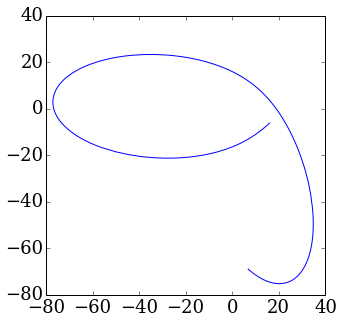

In [22]:
figsize(5, 5)
plot(pos_sag[:,0], pos_sag[:,2])

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':
/usr/lib/python3/dist-packages/matplotlib/bezier.py:294: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  path_out = Path(concat([verts_right, path.vertices[i:]]),
/usr/lib/python3/dist-packages/matplotlib/bezier.py:295: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  concat([codes_right, path.codes[i:]]))


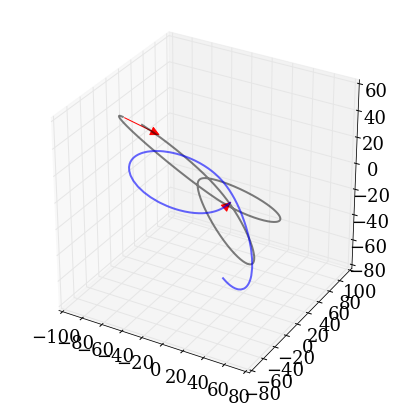

In [42]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(posNGC_sphMW[:,0], posNGC_sphMW[:,1], posNGC_sphMW[:,2], c='k', alpha=0.5, lw=2)
ax.plot(pos_sag[:,0], pos_sag[:,1], pos_sag[:,2], c='b', alpha=0.6, lw=2)

v_NGC2419 =Arrow3D([pos_NGC2419[0],pos_NGC2419[0]+vel_NGC_ar_normed[0]],[pos_NGC2419[1], pos_NGC2419[1]+vel_NGC_ar_normed[1]]
          ,[pos_NGC2419[2], pos_NGC2419[2]+vel_NGC_ar_normed[2]], mutation_scale=20, lw=1, arrowstyle="-|>", color="r")

v_sag =Arrow3D([sgr_pos[0], sgr_pos[0]+vel_sag_normed[0]],[sgr_pos[1], sgr_pos[1]+vel_sag_normed[1]]
          ,[sgr_pos[2], sgr_pos[2]+vel_sag_normed[2]], mutation_scale=20, lw=1, arrowstyle="-|>", color="r")


ax.add_artist(v_NGC2419)
ax.add_artist(v_sag)

# Orbits around a spherical MW with an LMC

In [78]:
t, posLMC1, velLMC1, posMW1, velMW1, posNGC1, velNGC1 = leapfrog.integrate_sat(time, pos_host, vel_host, host_model,\
                                                                           disk_params, bulge_params, lmc_model='LMC1',\
                                                                          pos_p=pos_NGC2419, vel_p=vel_NGC2419, dt=0.001)

t, posLMC2, velLMC2, posMW2, velMW2, posNGC2, velNGC2 = leapfrog.integrate_sat(time, pos_host, vel_host, host_model,\
                                                                           disk_params, bulge_params, lmc_model='LMC2',\
                                                                          pos_p=pos_NGC2419, vel_p=vel_NGC2419, dt=0.001)

t, posLMC3, velLMC3, posMW3, velMW3, posNGC3, velNGC3 = leapfrog.integrate_sat(time, pos_host, vel_host, host_model,\
                                                                           disk_params, bulge_params, lmc_model='LMC3',\
                                                                          pos_p=pos_NGC2419, vel_p=vel_NGC2419, dt=0.001)

t, posLMC4, velLMC4, posMW4, velMW4, posNGC4, velNGC4 = leapfrog.integrate_sat(time, pos_host, vel_host, host_model,\
                                                                           disk_params, bulge_params, lmc_model='LMC4',\
                                                                          pos_p=pos_NGC2419, vel_p=vel_NGC2419, dt=0.001)

t, posLMC5, velLMC5, posMW5, velMW5, posNGC5, velNGC5 = leapfrog.integrate_sat(time, pos_host, vel_host, host_model,\
                                                                           disk_params, bulge_params, lmc_model='LMC5',\
                                                                          pos_p=pos_NGC2419, vel_p=vel_NGC2419, dt=0.001)

t, posLMC6, velLMC6, posMW6, velMW6, posNGC6, velNGC6 = leapfrog.integrate_sat(time, pos_host, vel_host, host_model,\
                                                                          disk_params, bulge_params, lmc_model='LMC6',\
                                                                          pos_p=pos_NGC2419, vel_p=vel_NGC2419, dt=0.001)

using the  LMC2
-87.43 -0.51 37.31 16.9258863316 49.5606315185 -32.0415721311
-1.0
using the  LMC3
-87.43 -0.51 37.31 16.9258863316 49.5606315185 -32.0415721311
-1.0
using the  LMC4
-87.43 -0.51 37.31 16.9258863316 49.5606315185 -32.0415721311
-1.0
using the  LMC5
-87.43 -0.51 37.31 16.9258863316 49.5606315185 -32.0415721311
-1.0
using the  LMC6
-87.43 -0.51 37.31 16.9258863316 49.5606315185 -32.0415721311
-1.0


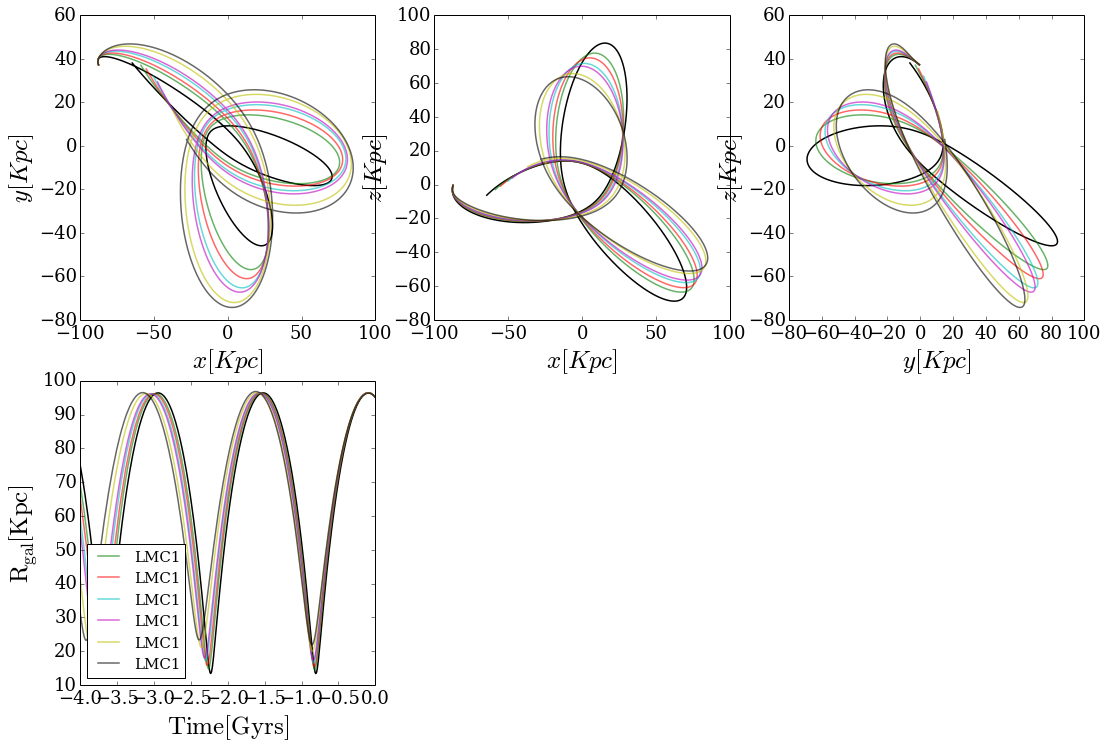

In [140]:
figure(figsize=(18,12))

subplot(2, 3, 1)
plot(posNGC_sphMW[:,0], posNGC_sphMW[:,2], lw=1.5, c='k')
plot(posNGC1_df[:,0]-posMW1_df[:,0], posNGC1_df[:,2]-posMW1_df[:,2], lw=1.5, label='LMC1', alpha=0.6)
plot(posNGC2_df[:,0]-posMW2_df[:,0], posNGC2_df[:,2]-posMW2_df[:,2], lw=1.5, label='LMC2', alpha=0.6)
plot(posNGC3_df[:,0]-posMW3_df[:,0], posNGC3_df[:,2]-posMW3_df[:,2], lw=1.5, label='LMC3', alpha=0.6)
plot(posNGC4_df[:,0]-posMW4_df[:,0], posNGC4_df[:,2]-posMW4_df[:,2], lw=1.5, label='LMC4', alpha=0.6)
plot(posNGC5_df[:,0]-posMW5_df[:,0], posNGC5_df[:,2]-posMW5_df[:,2], lw=1.5, label='LMC5', alpha=0.6)
plot(posNGC6_df[:,0]-posMW6_df[:,0], posNGC6_df[:,2]-posMW6_df[:,2], lw=1.5, label='LMC6', alpha=0.6)

xlabel('$x [Kpc]$', fontsize=25)
ylabel('$y [Kpc]$', fontsize=25)

subplot(2, 3, 2)
plot(posNGC_sphMW[:,0], posNGC_sphMW[:,1], lw=1.5, c='k')
plot(posNGC1_df[:,0]-posMW1_df[:,0], posNGC1_df[:,1]-posMW1_df[:,1], lw=1.5, label='LMC1', alpha=0.6)
plot(posNGC2_df[:,0]-posMW2_df[:,0], posNGC2_df[:,1]-posMW2_df[:,1], lw=1.5, label='LMC2', alpha=0.6)
plot(posNGC3_df[:,0]-posMW3_df[:,0], posNGC3_df[:,1]-posMW3_df[:,1], lw=1.5, label='LMC3', alpha=0.6)
plot(posNGC4_df[:,0]-posMW4_df[:,0], posNGC4_df[:,1]-posMW4_df[:,1], lw=1.5, label='LMC4', alpha=0.6)
plot(posNGC5_df[:,0]-posMW5_df[:,0], posNGC5_df[:,1]-posMW5_df[:,1], lw=1.5, label='LMC5', alpha=0.6)
plot(posNGC6_df[:,0]-posMW6_df[:,0], posNGC6_df[:,1]-posMW6_df[:,1], lw=1.5, label='LMC6', alpha=0.6)

xlabel('$x [Kpc]$', fontsize=25)
ylabel('$z [Kpc]$', fontsize=25)

subplot(2, 3, 3)
plot(posNGC_sphMW[:,1], posNGC_sphMW[:,2], lw=1.5, c='k')
plot(posNGC1_df[:,1]-posMW1_df[:,1], posNGC1_df[:,2]-posMW1_df[:,2], lw=1.5, label='LMC1', alpha=0.6)
plot(posNGC2_df[:,1]-posMW2_df[:,1], posNGC2_df[:,2]-posMW2_df[:,2], lw=1.5, label='LMC2', alpha=0.6)
plot(posNGC3_df[:,1]-posMW3_df[:,1], posNGC3_df[:,2]-posMW3_df[:,2], lw=1.5, label='LMC3', alpha=0.6)
plot(posNGC4_df[:,1]-posMW4_df[:,1], posNGC4_df[:,2]-posMW4_df[:,2], lw=1.5, label='LMC4', alpha=0.6)
plot(posNGC5_df[:,1]-posMW5_df[:,1], posNGC5_df[:,2]-posMW5_df[:,2], lw=1.5, label='LMC5', alpha=0.6)
plot(posNGC6_df[:,1]-posMW6_df[:,1], posNGC6_df[:,2]-posMW6_df[:,2], lw=1.5, label='LMC6', alpha=0.6)

xlabel('$y [Kpc]$', fontsize=25)
ylabel('$z [Kpc]$', fontsize=25)

subplot(2, 3, 4)



r_gal_sphMW = (posNGC_sphMW[:,0]**2.0+posNGC_sphMW[:,1]**2.0+posNGC_sphMW[:,2]**2.0)**0.5
r_gal_sphMWLMC1_df = ((posNGC1_df[:,0]-posMW1_df[:,0])**2.0+(posNGC1_df[:,1]-posMW1_df[:,1])**2.0+(posNGC1_df[:,2]-posMW1_df[:,2])**2.0)**0.5
r_gal_sphMWLMC2_df = ((posNGC2_df[:,0]-posMW2_df[:,0])**2.0+(posNGC2_df[:,1]-posMW2_df[:,1])**2.0+(posNGC2_df[:,2]-posMW2_df[:,2])**2.0)**0.5
r_gal_sphMWLMC3_df = ((posNGC3_df[:,0]-posMW3_df[:,0])**2.0+(posNGC3_df[:,1]-posMW3_df[:,1])**2.0+(posNGC3_df[:,2]-posMW3_df[:,2])**2.0)**0.5
r_gal_sphMWLMC4_df = ((posNGC4_df[:,0]-posMW4_df[:,0])**2.0+(posNGC4_df[:,1]-posMW4_df[:,1])**2.0+(posNGC4_df[:,2]-posMW4_df[:,2])**2.0)**0.5
r_gal_sphMWLMC5_df = ((posNGC5_df[:,0]-posMW5_df[:,0])**2.0+(posNGC5_df[:,1]-posMW5_df[:,1])**2.0+(posNGC5_df[:,2]-posMW5_df[:,2])**2.0)**0.5
r_gal_sphMWLMC6_df = ((posNGC6_df[:,0]-posMW6_df[:,0])**2.0+(posNGC6_df[:,1]-posMW6_df[:,1])**2.0+(posNGC6_df[:,2]-posMW6_df[:,2])**2.0)**0.5

plot(t, r_gal_sphMW, lw=1.5, c='k')
plot(t, r_gal_sphMWLMC1_df, lw=1.5, label='LMC1', alpha=0.6)
plot(t, r_gal_sphMWLMC2_df, lw=1.5, label='LMC1', alpha=0.6)
plot(t, r_gal_sphMWLMC3_df, lw=1.5, label='LMC1', alpha=0.6)
plot(t, r_gal_sphMWLMC4_df, lw=1.5, label='LMC1', alpha=0.6)
plot(t, r_gal_sphMWLMC5_df, lw=1.5, label='LMC1', alpha=0.6)
plot(t, r_gal_sphMWLMC6_df, lw=1.5, label='LMC1', alpha=0.6)
legend(loc='best', fontsize=15)

xlabel('$\mathrm{Time [Gyrs]}$', fontsize=25)
ylabel('$\mathrm{R_{gal}[Kpc]}$', fontsize=25)

savefig('2419_sphMW_LMC.pdf', bbox_inches='tight', dpi=300)

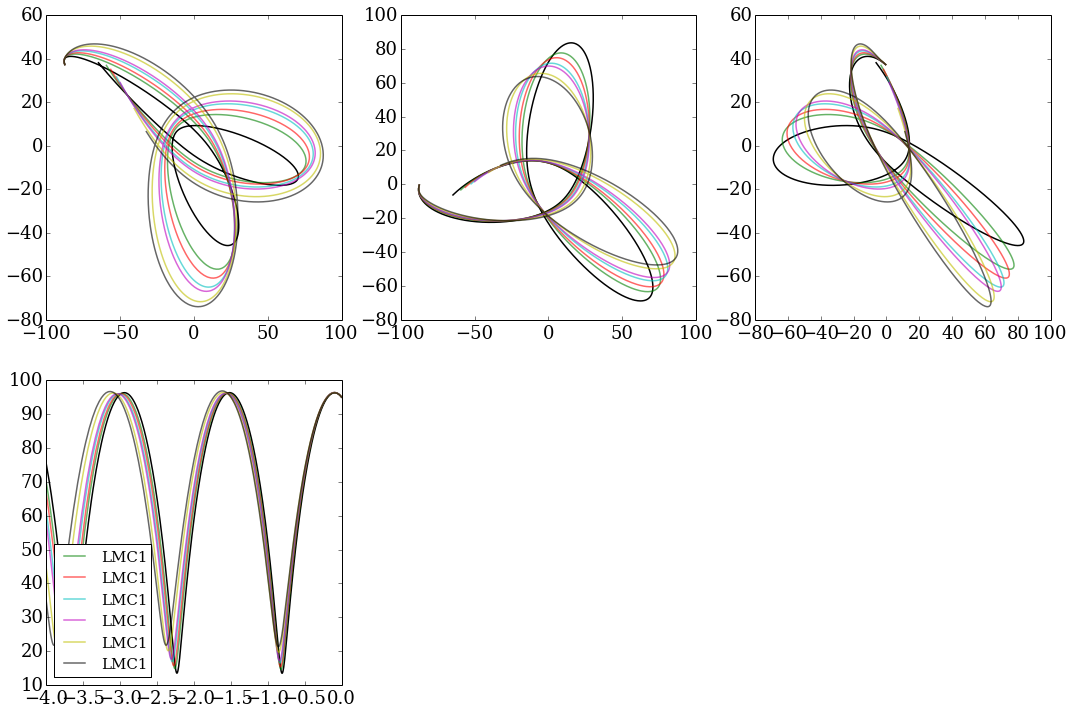

In [131]:
figure(figsize=(18,12))

subplot(2, 3, 1)
plot(posNGC_sphMW[:,0], posNGC_sphMW[:,2], lw=1.5, c='k')
plot(posNGC1[:,0]-posMW1[:,0], posNGC1[:,2]-posMW1[:,2], lw=1.5, label='LMC1', alpha=0.6)
plot(posNGC2[:,0]-posMW2[:,0], posNGC2[:,2]-posMW2[:,2], lw=1.5, label='LMC2', alpha=0.6)
plot(posNGC3[:,0]-posMW3[:,0], posNGC3[:,2]-posMW3[:,2], lw=1.5, label='LMC3', alpha=0.6)
plot(posNGC4[:,0]-posMW4[:,0], posNGC4[:,2]-posMW4[:,2], lw=1.5, label='LMC4', alpha=0.6)
plot(posNGC5[:,0]-posMW5[:,0], posNGC5[:,2]-posMW5[:,2], lw=1.5, label='LMC5', alpha=0.6)
plot(posNGC6[:,0]-posMW6[:,0], posNGC6[:,2]-posMW6[:,2], lw=1.5, label='LMC6', alpha=0.6)

subplot(2, 3, 2)
plot(posNGC_sphMW[:,0], posNGC_sphMW[:,1], lw=1.5, c='k')
plot(posNGC1[:,0]-posMW1[:,0], posNGC1[:,1]-posMW1[:,1], lw=1.5, label='LMC1', alpha=0.6)
plot(posNGC2[:,0]-posMW2[:,0], posNGC2[:,1]-posMW2[:,1], lw=1.5, label='LMC2', alpha=0.6)
plot(posNGC3[:,0]-posMW3[:,0], posNGC3[:,1]-posMW3[:,1], lw=1.5, label='LMC3', alpha=0.6)
plot(posNGC4[:,0]-posMW4[:,0], posNGC4[:,1]-posMW4[:,1], lw=1.5, label='LMC4', alpha=0.6)
plot(posNGC5[:,0]-posMW5[:,0], posNGC5[:,1]-posMW5[:,1], lw=1.5, label='LMC5', alpha=0.6)
plot(posNGC6[:,0]-posMW6[:,0], posNGC6[:,1]-posMW6[:,1], lw=1.5, label='LMC6', alpha=0.6)

subplot(2, 3, 3)
plot(posNGC_sphMW[:,1], posNGC_sphMW[:,2], lw=1.5, c='k')
plot(posNGC1[:,1]-posMW1[:,1], posNGC1[:,2]-posMW1[:,2], lw=1.5, label='LMC1', alpha=0.6)
plot(posNGC2[:,1]-posMW2[:,1], posNGC2[:,2]-posMW2[:,2], lw=1.5, label='LMC2', alpha=0.6)
plot(posNGC3[:,1]-posMW3[:,1], posNGC3[:,2]-posMW3[:,2], lw=1.5, label='LMC3', alpha=0.6)
plot(posNGC4[:,1]-posMW4[:,1], posNGC4[:,2]-posMW4[:,2], lw=1.5, label='LMC4', alpha=0.6)
plot(posNGC5[:,1]-posMW5[:,1], posNGC5[:,2]-posMW5[:,2], lw=1.5, label='LMC5', alpha=0.6)
plot(posNGC6[:,1]-posMW6[:,1], posNGC6[:,2]-posMW6[:,2], lw=1.5, label='LMC6', alpha=0.6)

subplot(2, 3, 4)

r_gal_sphMW = (posNGC_sphMW[:,0]**2.0+posNGC_sphMW[:,1]**2.0+posNGC_sphMW[:,2]**2.0)**0.5
r_gal_sphMWLMC1 = ((posNGC1[:,0]-posMW1[:,0])**2.0+(posNGC1[:,1]-posMW1[:,1])**2.0+(posNGC1[:,2]-posMW1[:,2])**2.0)**0.5
r_gal_sphMWLMC2 = ((posNGC2[:,0]-posMW2[:,0])**2.0+(posNGC2[:,1]-posMW2[:,1])**2.0+(posNGC2[:,2]-posMW2[:,2])**2.0)**0.5
r_gal_sphMWLMC3 = ((posNGC3[:,0]-posMW3[:,0])**2.0+(posNGC3[:,1]-posMW3[:,1])**2.0+(posNGC3[:,2]-posMW3[:,2])**2.0)**0.5
r_gal_sphMWLMC4 = ((posNGC4[:,0]-posMW4[:,0])**2.0+(posNGC4[:,1]-posMW4[:,1])**2.0+(posNGC4[:,2]-posMW4[:,2])**2.0)**0.5
r_gal_sphMWLMC5 = ((posNGC5[:,0]-posMW5[:,0])**2.0+(posNGC5[:,1]-posMW5[:,1])**2.0+(posNGC5[:,2]-posMW5[:,2])**2.0)**0.5
r_gal_sphMWLMC6 = ((posNGC6[:,0]-posMW6[:,0])**2.0+(posNGC6[:,1]-posMW6[:,1])**2.0+(posNGC6[:,2]-posMW6[:,2])**2.0)**0.5

plot(t, r_gal_sphMW, lw=1.5, c='k')
plot(t, r_gal_sphMWLMC1, lw=1.5, label='LMC1', alpha=0.6)
plot(t, r_gal_sphMWLMC2, lw=1.5, label='LMC1', alpha=0.6)
plot(t, r_gal_sphMWLMC3, lw=1.5, label='LMC1', alpha=0.6)
plot(t, r_gal_sphMWLMC4, lw=1.5, label='LMC1', alpha=0.6)
plot(t, r_gal_sphMWLMC5, lw=1.5, label='LMC1', alpha=0.6)
plot(t, r_gal_sphMWLMC6, lw=1.5, label='LMC1', alpha=0.6)
legend(loc='best', fontsize=15)

# Now with df 

In [75]:
LMC1_Nbody = np.loadtxt('../../LMC-MW/code/LMC_orbit/orbits/LMC6_H1.txt')

In [81]:
t_t, posLMC_test, velLMC_test, posMW_test, velMW_test = leapfrog.integrate_sat(time, pos_host, vel_host, host_model,\
                                                                           disk_params, bulge_params, lmc_model='LMC6',\
                                                                           dt=0.01, alpha=[0, 0.26])

using the  LMC6
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
done t=1


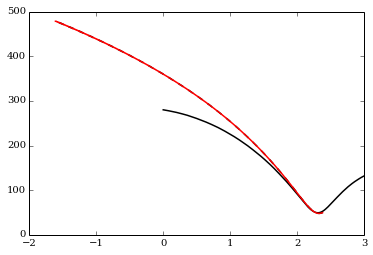

In [85]:
LMC6_t = ((posLMC_test[:,0]-posMW_test[:,0])**2 + (posLMC_test[:,1]-posMW_test[:,1])**2 + (posLMC_test[:,2]-posMW_test[:,2])**2)**0.5
LMC6_tG = galactocentic(posMW_test, posLMC_test)

plot(LMC1_Nbody[:,0], LMC1_Nbody[:,1], c='k', lw=1.5)
plot(t_t+LMC1_Nbody[119,0], LMC6_t, c='k', lw=1.5, ls='--')
plot(t_t+LMC1_Nbody[119,0], (LMC6_tG[:,0]**2 + LMC6_tG[:,1]**2 + LMC6_tG[:,2]**2)**0.5, c='r', lw=1.5)

In [93]:
host_model = ['NFW', 1E12, 261, 9.86]
disk_params = [6.5E10, 3.5, 0.53]
bulge_params = [1E10, 0.7]

using the  LMC1
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
done t=1
using the  LMC2
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
done t=1
using the  LMC3
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
done t=1
using the  LMC4
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
done t=1
using the  LMC5
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
done t=1
using the  LMC6
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
done t=1


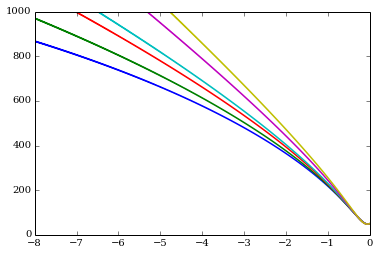

In [95]:
LMC_models = ['LMC1', 'LMC2', 'LMC3', 'LMC4', 'LMC5', 'LMC6']
for i in LMC_models:
    t_t, posLMC_test, velLMC_test, posMW_test, velMW_test = leapfrog.integrate_sat(8, pos_host, vel_host, host_model,\
                                                                               disk_params, bulge_params, lmc_model=i,\
                                                                               dt=0.01, alpha=[0, 1])
    LMC_G = galactocentic(posMW_test, posLMC_test)
    plot(t_t, (LMC_G[:,0]**2 + LMC_G[:,1]**2 + LMC_G[:,2]**2)**0.5, lw=1.5)
    ylim(0, 1000)
    


In [128]:
t, posLMC1_df, velLMC1_df, posMW1_df, velMW1_df, posNGC1_df, velNGC1_df = leapfrog.integrate_sat(time, pos_host, vel_host, host_model,\
                                                                           disk_params, bulge_params, lmc_model='LMC1',\
                                                                          pos_p=pos_NGC2419, vel_p=vel_NGC2419, dt=0.001,
                                                                              alpha=[0, 0.26])

t, posLMC2_df, velLMC2_df, posMW2_df, velMW2_df, posNGC2_df, velNGC2_df = leapfrog.integrate_sat(time, pos_host, vel_host, host_model,\
                                                                           disk_params, bulge_params, lmc_model='LMC2',\
                                                                          pos_p=pos_NGC2419, vel_p=vel_NGC2419, dt=0.001,
                                                                              alpha=[0, 0.26])

t, posLMC3_df, velLMC3_df, posMW3_df, velMW3_df, posNGC3_df, velNGC3_df = leapfrog.integrate_sat(time, pos_host, vel_host, host_model,\
                                                                           disk_params, bulge_params, lmc_model='LMC3',\
                                                                          pos_p=pos_NGC2419, vel_p=vel_NGC2419, dt=0.001,
                                                                              alpha=[0, 0.26])

t, posLMC4_df, velLMC4_df, posMW4_df, velMW4_df, posNGC4_df, velNGC4_df = leapfrog.integrate_sat(time, pos_host, vel_host, host_model,\
                                                                           disk_params, bulge_params, lmc_model='LMC4',\
                                                                          pos_p=pos_NGC2419, vel_p=vel_NGC2419, dt=0.001,
                                                                              alpha=[0, 0.26])

t, posLMC5_df, velLMC5_df, posMW5_df, velMW5_df, posNGC5_df, velNGC5_df = leapfrog.integrate_sat(time, pos_host, vel_host, host_model,\
                                                                           disk_params, bulge_params, lmc_model='LMC5',\
                                                                          pos_p=pos_NGC2419, vel_p=vel_NGC2419, dt=0.001,
                                                                              alpha=[0, 0.26])

t, posLMC6_df, velLMC6_df, posMW6_df, velMW6_df, posNGC6_df, velNGC6_df = leapfrog.integrate_sat(time, pos_host, vel_host, host_model,\
                                                                          disk_params, bulge_params, lmc_model='LMC6',\
                                                                          pos_p=pos_NGC2419, vel_p=vel_NGC2419, dt=0.001,
                                                                              alpha=[0, 0.26])

using the  LMC1
-87.43 -0.51 37.31 16.9258863316 49.5606315185 -32.0415721311
-1.0
using the  LMC2
-87.43 -0.51 37.31 16.9258863316 49.5606315185 -32.0415721311
-1.0
using the  LMC3
-87.43 -0.51 37.31 16.9258863316 49.5606315185 -32.0415721311
-1.0
using the  LMC4
-87.43 -0.51 37.31 16.9258863316 49.5606315185 -32.0415721311
-1.0
using the  LMC5
-87.43 -0.51 37.31 16.9258863316 49.5606315185 -32.0415721311
-1.0
using the  LMC6
-87.43 -0.51 37.31 16.9258863316 49.5606315185 -32.0415721311
-1.0


Host:  0.0 0.0 0.0
Satellite 1 : 16.1 2.35 -6.12
done t=1
Host:  0.0 0.0 0.0
Satellite 1 : 16.1 2.35 -6.12
done t=1
Host:  0.0 0.0 0.0
Satellite 1 : 16.1 2.35 -6.12
done t=1
Host:  0.0 0.0 0.0
Satellite 1 : 16.1 2.35 -6.12
done t=1


(10, 20)

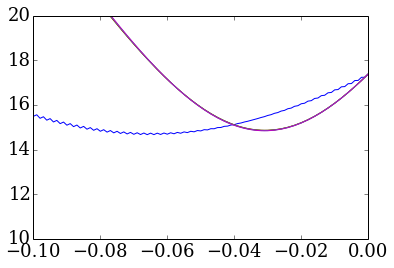

In [19]:
alphas=[0.1, 0.3, 0.7, 1.0]
plot(t, (posSag_G[:,0]**2.0 + posSag_G[:,1]**2.0 + posSag_G[:,2]**2.0)**0.5)

for i in range(len(alphas)):
    t, pos_sag4, vel_sag4, posMW_sag, velMW_Sag = leapfrog.integrate_sat(2, pos_host, vel_host, host_model, disk_params,
                                                                     bulge_params, satellite_model=satellite_model, dt=0.001,
                                                                     alpha=[0, alphas[i]], pos_sat=sgr_pos, vel_sat=sgr_vel)
    pos_Sag4_G = galactocentic(posMW_sag, pos_sag4)
    plot(t, (pos_sag4[:,0]**2.0+pos_sag4[:,1]**2.0+pos_sag4[:,2]**2.0)**0.5)
    
    
xlim(-0.1, 0)
ylim(10, 20)
                                                                                        

# Orbits in the Vera-Ciro 13 potential